ERRO: Arquivo não encontrado: z:\02_SHK\05_dgl_gm\05_Scripts\rs_n_cm\data\output\exp1\surface_data\Subtraction_Side1_Side2.json


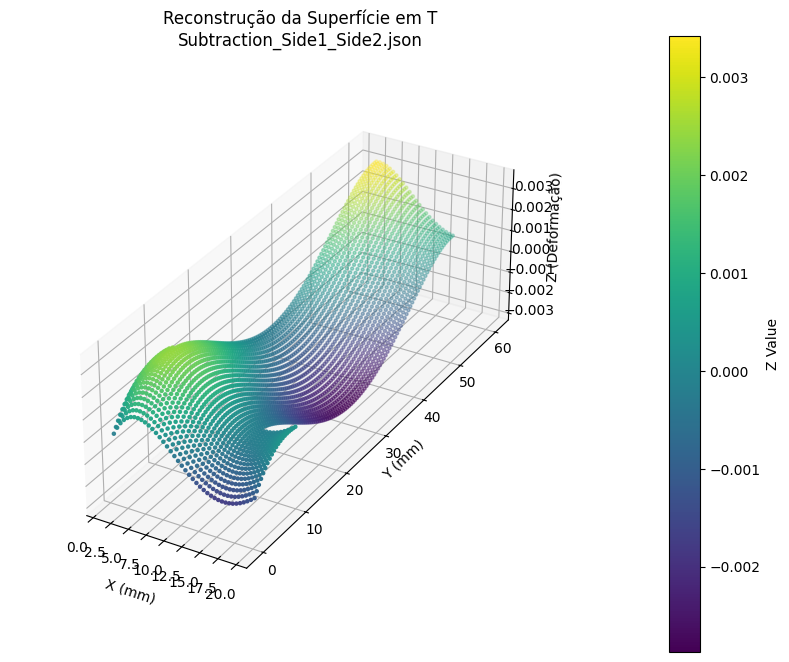

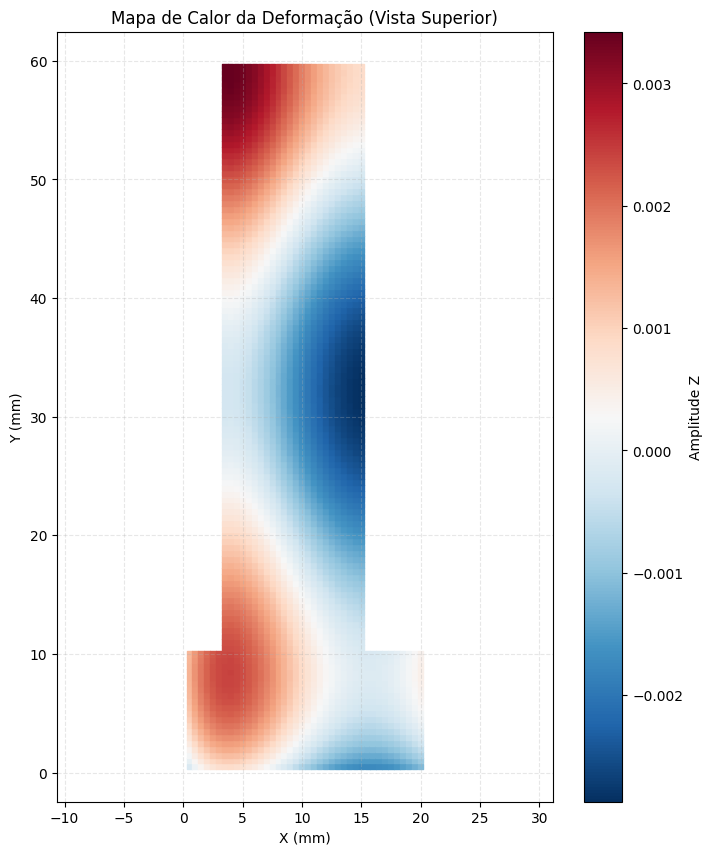

In [ ]:
# %% [markdown]
# # Visualização da Peça em T (Reconstrução)
# Este notebook carrega os coeficientes do modelo JSON final e reconstrói a superfície
# usando a malha em T (MeshGenerator) definida no sistema.

# %%
import os
import sys
import numpy as np


notebook_dir = os.getcwd()
project_root = os.path.dirname(notebook_dir)
src_path = os.path.join(project_root, 'src')
exp1_out = os.path.join(project_root, 'data', 'input', 'exp1')
exp1_in = os.path.join(project_root, 'data', 'output', 'exp1')
if src_path not in sys.path:
    sys.path.append(src_path)

# Importações do seu pacote
from exp_process.core.mesher import MeshGenerator
from exp_process.core.fitter import Fitter
from exp_process.utils.io import IOUtils
from processor import ExpProcessor

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sample_file = os.path.join(exp1_out, "exp1_sample01.py")
# %% [markdown]

t_dims = ExpProcessor.process(sample_file)

model_side = "Side2.json"
model_side = "Side1.json" 
model_side = "Average_Side1_Side2.json"

input_json_path = os.path.join(exp1_in, "surface_data", model_side)
step_size = 0.5 

# %% [markdown]
if not os.path.exists(input_json_path):
    print(f"ERRO: Arquivo não encontrado: {input_json_path}")
else:
    model_data = IOUtils.load_json(input_json_path)
    print(f"Modelo carregado: {model_data.get('side', 'Desconhecido')}")
    print(f"Grau do polinômio: {model_data.get('degree')}")

    # 2. Gerar a Malha em T (X, Y)
    # O MeshGenerator retorna vetores flat (1D) de X e Y apenas onde a peça existe
    x_t, y_t = MeshGenerator.t_shape_grid(t_dims, step=step_size)
    print(f"Pontos gerados na malha T: {len(x_t)}")

    # 3. Calcular Z (Avaliar o Polinômio na Malha)
    # Usa os coeficientes carregados para projetar a superfície na forma T
    z_t = Fitter.eval_2d_poly(x_t, y_t, model_data)

# %% [markdown]

# %%
#%matplotlib widget 
# Se der erro no widget, troque para %matplotlib inline ou remova a linha

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot da superfície (Scatter plot denso funciona bem para malhas irregulares como T)
sc = ax.scatter(x_t, y_t, z_t, c=z_t, cmap='viridis', s=5)

ax.set_title(f"Reconstrução da Superfície em T\n{os.path.basename(input_json_path)}")
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (Deformação)')

# Barra de cores
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Z Value')

# Ajusta proporção dos eixos para não distorcer a peça
ax.set_box_aspect((np.ptp(x_t), np.ptp(y_t), np.ptp(x_t)))  # Aspect ratio falso para visualização melhor

plt.show()

# %% [markdown]
# ### 4. Visualização 2D (Mapa de Calor)
# Visto de cima (Top View)

# %%
plt.figure(figsize=(8, 10))
plt.scatter(x_t, y_t, c=z_t, cmap='RdBu_r', s=15, marker='s') # marker quadrado preenche melhor
plt.colorbar(label='Amplitude Z')
plt.axis('equal') # Garante que a proporção X/Y seja real
plt.title("Mapa de Calor da Deformação (Vista Superior)")
plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()